# PRE-PROCESSING

In [4]:
import matplotlib.pyplot as plt
import cv2 
import pandas as pd
import numpy as np
import seaborn as sns

In [5]:
# Dataframe loading with pictures labels
train = pd.read_csv("train.csv")

In [6]:
# split column Image_Label
split_df = train["Image_Label"].str.split("_", n = 1, expand = True)
# add new columns to train_df
train['Image'] = split_df[0]
train['Label'] = split_df[1]
# check the result
train.head()

,Image_Label,EncodedPixels,Image,Label
0,0011165.jpg_Fish,264918 937 266318 937 267718 937 269118 937 27...,0011165.jpg,Fish
1,0011165.jpg_Flower,1355565 1002 1356965 1002 1358365 1002 1359765...,0011165.jpg,Flower
2,0011165.jpg_Gravel,NaN,0011165.jpg,Gravel
3,0011165.jpg_Sugar,NaN,0011165.jpg,Sugar
4,002be4f.jpg_Fish,233813 878 235213 878 236613 878 238010 881 23...,002be4f.jpg,Fish


In [7]:
train = train.dropna()
train.isna().sum()

Image_Label      0
EncodedPixels    0
Image            0
Label            0
dtype: int64

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11836 entries, 0 to 22181
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Image_Label    11836 non-null  object
 1   EncodedPixels  11836 non-null  object
 2   Image          11836 non-null  object
 3   Label          11836 non-null  object
dtypes: object(4)
memory usage: 462.3+ KB


In [9]:
train.describe()

,Image_Label,EncodedPixels,Image,Label
count,11836,11836,11836,11836
unique,11836,11836,5546,4
top,5eef1a6.jpg_Gravel,46733 640 48133 640 49533 640 50933 640 52333 ...,23d1c12.jpg,Sugar
freq,1,1,4,3751


In [10]:
# Creation of a list of pictures containing only one cloud shape (fish or flower or gravel or sugar)
df = train.groupby("Image").count()
df = df[df["Label"]==1]
df.head(100)

,Image_Label,EncodedPixels,Label
Image,,,
00498ec.jpg,1,1,1
008233e.jpg,1,1,1
0095357.jpg,1,1,1
00d4443.jpg,1,1,1
0104b5b.jpg,1,1,1
...,...,...,...
144d107.jpg,1,1,1
144d4a8.jpg,1,1,1
148a6ef.jpg,1,1,1


In [11]:
images = df.index

In [12]:
train = train[train["Image"].isin(images)]

In [13]:
train.describe()

,Image_Label,EncodedPixels,Image,Label
count,1348,1348,1348,1348
unique,1348,1348,1348,4
top,c0eea70.jpg_Gravel,1815697 4 1815719 2 1815723 1 1817097 3 181992...,240adca.jpg,Sugar
freq,1,1,1,432


In [14]:
train.head()

,Image_Label,EncodedPixels,Image,Label
22,00498ec.jpg_Gravel,326420 552 327820 552 329220 552 330620 552 33...,00498ec.jpg,Gravel
35,008233e.jpg_Sugar,910449 829 911849 829 913249 829 914649 829 91...,008233e.jpg,Sugar
47,0095357.jpg_Sugar,1757754 373 1759154 373 1760554 373 1761954 37...,0095357.jpg,Sugar
71,00d4443.jpg_Sugar,70287 806 71687 806 73087 806 74487 806 75887 ...,00d4443.jpg,Sugar
83,0104b5b.jpg_Sugar,310008 640 311408 640 312808 640 314208 640 31...,0104b5b.jpg,Sugar


In [15]:
# Re-indexation
train = train.reset_index(drop=True)

In [16]:
# Number of picture of each form
print(train.Label.value_counts())

Sugar     432
Flower    355
Gravel    287
Fish      274
Name: Label, dtype: int64


In [17]:
# Function to decode the masks 
def rle2mask(rle, input_shape=(1400,2100)):
    width, height = input_shape[:2]
    
    mask= np.zeros( width*height ).astype(np.uint8)
    
    array = np.asarray([int(x) for x in rle.split()])
    starts = array[0::2]
    lengths = array[1::2]

    current_position = 0
    for index, start in enumerate(starts):
        mask[int(start):int(start+lengths[index])] = 1
        current_position += lengths[index]
        
    return mask.reshape(height, width).T

In [18]:
train["decoded_rle"] = train['EncodedPixels'].apply(lambda x:rle2mask(str(x)))

In [19]:
train.head()

,Image_Label,EncodedPixels,Image,Label,decoded_rle
0,00498ec.jpg_Gravel,326420 552 327820 552 329220 552 330620 552 33...,00498ec.jpg,Gravel,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1,008233e.jpg_Sugar,910449 829 911849 829 913249 829 914649 829 91...,008233e.jpg,Sugar,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2,0095357.jpg_Sugar,1757754 373 1759154 373 1760554 373 1761954 37...,0095357.jpg,Sugar,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3,00d4443.jpg_Sugar,70287 806 71687 806 73087 806 74487 806 75887 ...,00d4443.jpg,Sugar,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
4,0104b5b.jpg_Sugar,310008 640 311408 640 312808 640 314208 640 31...,0104b5b.jpg,Sugar,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


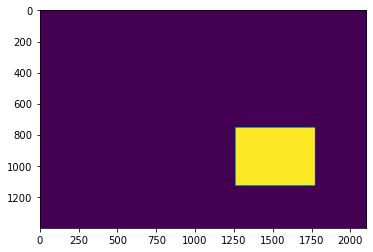

In [20]:
# Example of mask
plt.imshow(train["decoded_rle"][2])

## Building of the masks for each picture

In [21]:
def np_resize(img, input_shape):
    """
    Reshape a numpy array, which is input_shape=(height, width), 
    as opposed to input_shape=(width, height) for cv2
    """
    height, width = input_shape
    return cv2.resize(img, (width, height))

In [22]:
# Modified function
def build_masks(rles, input_shape, reshape=None):
    depth = len(rles)
    if reshape is None:
        masks = np.zeros((depth, *input_shape))
    else:
        masks = np.zeros((depth, *reshape))
    
    for i, rle in enumerate(rles):
        if type(rle) is str:
            if reshape is None:
                masks[:, :, i] = rle2mask(rle, input_shape)
            else:
                mask = rle2mask(rle, input_shape)
                reshaped_mask = np_resize(mask, reshape)
                masks[i,:, :] = reshaped_mask
    
    return masks

In [23]:
rles = train['EncodedPixels'].values

In [24]:
masks = build_masks(rles, input_shape=(1400,2100), reshape=(256,256))

In [25]:
# I am going in the directory to load the pictures later 
import os
from os import chdir as cd
cd ("/home/jacquin/Documents/DATA_SCIENCE/COMPETITION/CLOUDS/DATA")

## Definition of the training and test sets

In [26]:
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import numpy as np
import tensorflow as tf

In [27]:
# Data training
data = train["Image"]

In [28]:
# Data target
target = masks

In [29]:
# Split of the training and test data
X_train_path, X_test_path, y_train, y_test = train_test_split(data, target, train_size=0.8, random_state=456)

In [30]:
# Chargement des images qui serviront de TEST à partir du répertoire TRAIN et redimensionnement
# Il faudra changer et charger les images du répertoire TEST à la fin du  projet ?!
X_test = []
for filepath in tqdm(X_test_path):
    # Read the file
    im = tf.io.read_file(filepath)
    # Decode the file
    im = tf.image.decode_jpeg(im, channels=3)
    # Resizing
    im = tf.image.resize(im, size=(256,256))
    X_test.append([im])
    
X_test = tf.concat(X_test, axis=0)

100%|██████████| 270/270 [00:00<00:00, 295.01it/s]


Vérifications

In [28]:
X_train_path.shape

(1078,)

In [29]:
X_test_path.shape

(270,)

In [30]:
y_train.shape

(1078, 256, 256)

In [31]:
y_test.shape

(270, 256, 256)

In [32]:
# Pipeline allowing to resize the pictures and gather them by batch :
@tf.function
def load_image(filepath, resize=(256,256)):
    im = tf.io.read_file(filepath)
    im = tf.image.decode_png(im, channels=3)
    return tf.image.resize(im, resize)

# Creation of the dataset
dataset_train = tf.data.Dataset.from_tensor_slices((X_train_path, y_train))

# Resizing of all the elements
dataset_train = dataset_train.map(lambda x, y : [load_image(x), y], num_parallel_calls=-1).batch(32)

In [33]:
# New check
for element in dataset_train:
    print(dataset_train)

<BatchDataset shapes: ((None, 256, 256, 3), (None, 256, 256)), types: (tf.float32, tf.float64)>
<BatchDataset shapes: ((None, 256, 256, 3), (None, 256, 256)), types: (tf.float32, tf.float64)>
<BatchDataset shapes: ((None, 256, 256, 3), (None, 256, 256)), types: (tf.float32, tf.float64)>
<BatchDataset shapes: ((None, 256, 256, 3), (None, 256, 256)), types: (tf.float32, tf.float64)>
<BatchDataset shapes: ((None, 256, 256, 3), (None, 256, 256)), types: (tf.float32, tf.float64)>
<BatchDataset shapes: ((None, 256, 256, 3), (None, 256, 256)), types: (tf.float32, tf.float64)>
<BatchDataset shapes: ((None, 256, 256, 3), (None, 256, 256)), types: (tf.float32, tf.float64)>
<BatchDataset shapes: ((None, 256, 256, 3), (None, 256, 256)), types: (tf.float32, tf.float64)>
<BatchDataset shapes: ((None, 256, 256, 3), (None, 256, 256)), types: (tf.float32, tf.float64)>
<BatchDataset shapes: ((None, 256, 256, 3), (None, 256, 256)), types: (tf.float32, tf.float64)>
<BatchDataset shapes: ((None, 256, 256, 

# DEFINITION OF THE U-NET MODEL

In [34]:
from keras.models import Sequential,Model
from keras.layers import Dense
from keras.layers import Dropout 
from keras.layers import Flatten
from keras.layers import Input
from keras.layers import concatenate
from keras.layers.convolutional import Conv2D, MaxPooling2D, UpSampling2D
from keras.utils import np_utils 

from sklearn import metrics

import matplotlib.pyplot as plt
from matplotlib import cm

import itertools

In [35]:
IMG_WIDTH = 256
IMG_HEIGHT = 256
IMG_CHANNELS = 3


#Build the model
inputs = tf.keras.layers.Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)

#Encodage
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)
 
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)
 
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)
 
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
c5 = tf.keras.layers.Dropout(0.3)(c5)
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

#Decodage
u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
u6 = tf.keras.layers.concatenate([u6, c4])
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
 
u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
u7 = tf.keras.layers.concatenate([u7, c3])
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
 
u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8, c2])
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = tf.keras.layers.Dropout(0.1)(c8)
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
 
u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = tf.keras.layers.Dropout(0.1)(c9)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)
 
outputs = tf.keras.layers.Conv2D(4, (1, 1), activation='softmax')(c9)
 
model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 256, 256, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 16) 448         lambda[0][0]                     
__________________________________________________________________________________________________
dropout (Dropout)               (None, 256, 256, 16) 0           conv2d[0][0]                     
______________________________________________________________________________________________

In [36]:
from tensorflow.keras import callbacks

# Save automatically the weights
checkpoint = callbacks.ModelCheckpoint(filepath = 'checkpoint', 
                                       monitor = 'val_loss',
                                       save_best_only = True,
                                       save_weights_only = False,
                                       mode = 'min',
                                       save_freq = 'epoch')

# Callback to reduce automatically the learning rate.
lr_plateau = callbacks.ReduceLROnPlateau(monitor = 'val_loss',
                                         patience=5,
                                         factor=0.1,
                                         verbose=2,
                                         mode='min')


# TRAINING OF THE MODEL

In [37]:
history = model.fit(dataset_train, epochs=5, batch_size = 8, validation_data=(X_test, y_test), callbacks = [lr_plateau, checkpoint])

Epoch 1/5
34/34 [==============================] - ETA: 0s - loss: 0.9647 - accuracy: 0.5190WARNING:tensorflow:From /home/jacquin/anaconda3/lib/python3.8/site-packages/tensorflow/python/ops/resource_variable_ops.py:1813: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: checkpoint/assets
34/34 [==============================] - 364s 11s/step - loss: 0.9647 - accuracy: 0.5190 - val_loss: 0.6623 - val_accuracy: 0.6388 - lr: 0.0010
Epoch 2/5
34/34 [==============================] - 361s 11s/step - loss: 0.6280 - accuracy: 0.6252 - val_loss: 0.6288 - val_accuracy: 0.6443 - lr: 0.0010
Epoch 3/5
34/34 [==============================] - 361s 11s/step - loss: 0.5957 - accuracy: 0.6451 - val_loss: 0.5918 - val_accuracy: 0.6526 - lr: 0.0010
Epoch 4/5
34/34 [================

## Model saving

In [38]:
model.save("/home/jacquin/Documents/DATA_SCIENCE/COMPETITION/CLOUDS/MODELES/Clouds_spy_3.1")

INFO:tensorflow:Assets written to: /home/jacquin/Documents/DATA_SCIENCE/COMPETITION/CLOUDS/MODELES/Clouds_spy_3.1/assets


## Display of the metrics

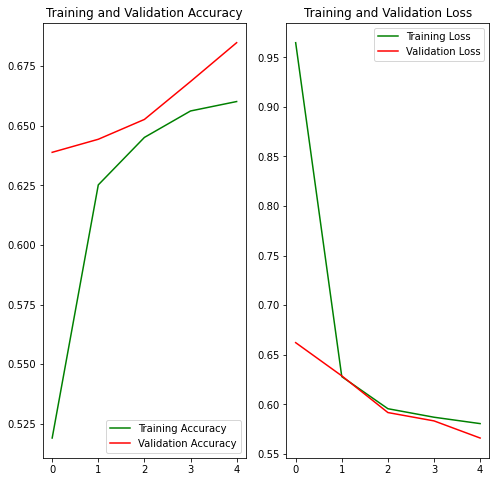

In [39]:
epochs = 5
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy', color="green")
plt.plot(epochs_range, val_acc, label='Validation Accuracy', color="red")
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss', color="green")
plt.plot(epochs_range, val_loss, label='Validation Loss', color="red")
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Predictions calculation

In [2]:
# Model loading
import keras
model = keras.models.load_model("/home/jacquin/Documents/DATA_SCIENCE/COMPETITION/CLOUDS/MODELES/Clouds_spy_3.1")

In [5]:
import os
test_dir = os.listdir("/home/jacquin/Documents/DATA_SCIENCE/COMPETITION/CLOUDS/DATA/")

In [24]:
import random

In [64]:
random_file = random.choice(test_dir)

In [104]:
random_file

'c6e5c16.jpg'

In [66]:
import tensorflow as tf

In [67]:
from os import chdir as cd
cd ("/home/jacquin/Documents/DATA_SCIENCE/COMPETITION/CLOUDS/DATA")

In [68]:
# Read the file
im = tf.io.read_file(random_file)
# Decode the file
img = tf.image.decode_jpeg(im, channels=3)

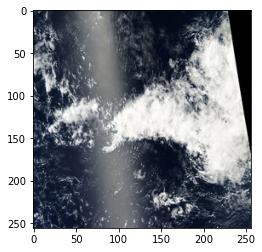

In [69]:
import matplotlib.pyplot as plt
plt.imshow(img)

In [71]:
img.dtype

tf.uint8

In [72]:
X_test = []
X_test.append([img]) 
X_test = tf.concat(X_test, axis=0)

# PROBABILITY CALCULATION

In [73]:
y_prob = model.predict(X_test)

CALCUL ET AFFICHAGE DES PREDICTIONS - PREMIERE TECHNIQUE ESSAYEE

In [74]:
# Pour prédire la classe de l'image, il suffit alors de trouver pour quelle classe la probabilité est maximale
y_pred = tf.argmax(y_prob, axis=-1).numpy()

In [75]:
# Prédiction du masque
pred_mask = y_pred[..., tf.newaxis]

In [76]:
pred_mask.shape

(1, 256, 256, 1)

In [94]:
pred_mask[0].dtype

dtype('int64')

In [77]:
import numpy as np

In [78]:
# Creation of the mask: need to transform the data with 1 channel of OpenCV
mask = pred_mask.astype(np.uint8)

In [93]:
mask[0].dtype

dtype('uint8')

# PREDICTIONS DISPLAY

## 1. Display side by side

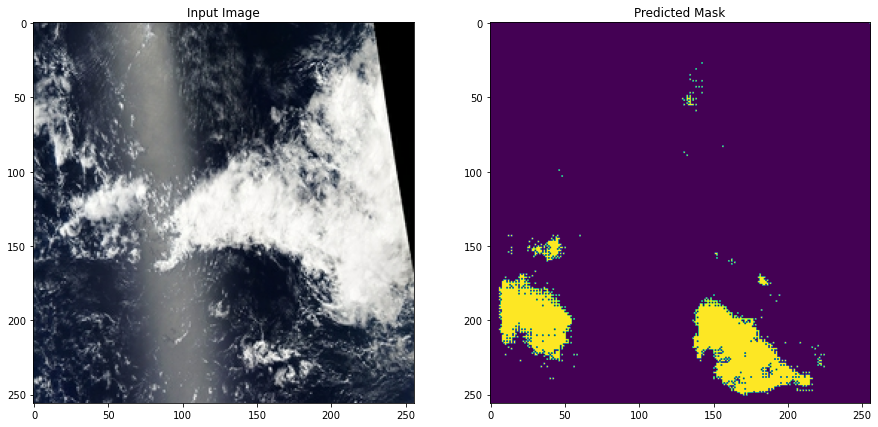

In [80]:
plt.figure(figsize=(15,15))
plt.subplot(1, 2, 1)
plt.title("Input Image")
plt.imshow(tf.keras.preprocessing.image.array_to_img(X_test[0]))
plt.subplot(1, 2, 2)
plt.title("Predicted Mask")
plt.imshow(tf.keras.preprocessing.image.array_to_img(mask[0]))
plt.show()

## 2. Display on the same image

In [87]:
import cv2

In [105]:
# Need to be in grayscale because masks have only one RGB channel
img_gray = cv2.imread(random_file, cv2.IMREAD_GRAYSCALE)

In [109]:
img_gray.shape

(256, 256)

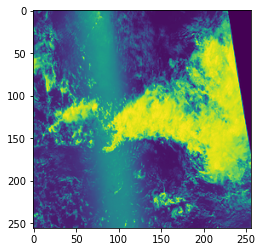

In [107]:
plt.imshow(img_gray)

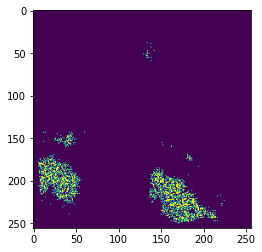

In [108]:
masked_image = cv2.bitwise_and(img_gray, mask[0])      
plt.imshow(masked_image)
plt.show()